In [3]:
### Library Imports
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# Function Imports
import sys
sys.path.append('/Users/mburley/TradingIndicators/Functions')  # Add the 'Functions' directory to the Python path
from IndicatorFunctions import import_stock_data, calculate_rsi, plot_function
from FilterFunctions import filter_indicators


In [4]:
### Load in Stock Data
tickers = ['CELH', 'LI', 'AMD', 'TSM', 'BA', 'RDDT', 'ONCT', 'PFE', 'STT', 'MSAI', 'WNS', 'TSLA', 'TNON', 'BTDR', 'RRGB', 'AVO', 'JPM', 'EL', 'CRDO', 'VC', 'BLK', 'APLD', 'LCID', 'ORCL', 'RIVN', 'RUN', 'QS', 'GME', 'CISS', 'ALLR', 'SCHW', 'TMO', 'ZM', 'NMRK', 'HD', 'PYPL', 'IBM', 'BABA', 'PINS', 'SPOT', 'XOM', 'CRSR', 'LMND', 'SE', 'JNJ', 'EXC', 'ABNB', 'ETSY', 'CVX', 'ACN', 'SNAP', 'NIO', 'SBUX', 'AAPL', 'MRO', 'CSCO', 'UPST', 'CRM', 'NKE', 'LYV', 'TDOC', 'ACRS', 'MCD', 'KO']
start_date = '2018-01-01'
stock_data = import_stock_data(tickers, start_date)
stock_data.tail(5)

[*********************100%%**********************]  64 of 64 completed


Price        Date       Close                                                  \
Ticker                   AAPL        ABNB         ACN  ACRS  ALLR         AMD   
1590   2024-04-29  173.500000  162.250000  303.160004  1.22  1.38  160.199997   
1591   2024-04-30  170.330002  158.570007  300.910004  1.21  1.27  158.380005   
1592   2024-05-01  169.300003  156.160004  298.660004  1.26  1.37  144.270004   
1593   2024-05-02  173.029999  158.330002  300.339996  1.31  1.23  146.160004   
1594   2024-05-03  184.304993  159.970001  304.269989  1.35  1.00  150.582993   

Price                             ...     Low                                 \
Ticker   APLD    AVO          BA  ...    TDOC         TMO   TNON        TSLA   
1590    2.710  11.46  173.490005  ...  12.880  571.299988  0.730  184.539993   
1591    2.705  11.35  167.839996  ...  12.735  567.969971  0.722  182.839996   
1592    3.000  11.56  171.460007  ...  12.530  568.400024  0.760  179.009995   
1593    2.960  11.79  178.850006  ...  12.600  565.489990  0.760  176.020004   
1594    3.025  11.80  179.384995  ...  12.820  573.679993  0.825  178.539993   

Price                                                                        
Ticker         TSM       UPST          VC        WNS         XOM         ZM  
1590    135.910004  22.830000  111.059998  40.020000  117.760002  62.500000  
1591    137.259995  22.090000  110.070000  41.770000  117.980003  60.889999  
1592    133.210007  22.010000  110.629997  41.610001  115.660004  60.689999  
1593    133.220001  22.879999  113.330002  43.139999  115.900002  61.799999  
1594           NaN  23.510000  113.389999        NaN  114.129997  61.340000  

[5 rows x 193 columns]

In [5]:
### Compute RSI for Multiple Tickers 
rsi_df, rsi_vals = calculate_rsi(stock_data, periods = 14, tickers = tickers)
print(rsi_df.tail(5))
#print("RSI values list: ", rsi_vals)

           CELH         LI        AMD        TSM         BA       RDDT  \
1590  24.592474  31.859075  40.181882  39.551793  42.223718  52.760998   
1591  22.222233  30.752539  41.586633  36.690634  39.367340  55.314334   
1592  29.910507  32.901756  29.119564  32.374928  47.228711  53.197541   
1593  37.929476  48.567436  35.107863  39.980867  62.282106  63.134975   
1594  56.647401  48.635405  41.740310  43.260933  65.771170  67.933360   

           ONCT        PFE        STT       MSAI  ...        MRO       CSCO  \
1590  48.076918  35.384597  38.159058  47.115381  ...  32.368416  24.367790   
1591  44.772123  39.884401  40.978862  45.937504  ...  18.485523  24.367790   
1592  40.281691  58.400008  46.219268  48.355265  ...  16.533868  17.745776   
1593  40.864713  68.253980  35.340904  51.543208  ...  17.811158  23.270399   
1594  49.078721  68.348178  46.162391  46.078427  ...  22.086551  33.333295   

           UPST        CRM        NKE        LYV       TDOC       ACRS  \
1590  

In [6]:
### Filter based on constraints:
    # Below 30 - indicate oversold conditions which generates a potential BUY signal, expect the price to rebound or correct upward after being oversold from downward selling pressure
    # Above 70 - indicate overbought conditions which generates a potential SELL signal
### Filter Function Call
filtered_df = filter_indicators(rsi_df, 70, 30, rsi_df.columns)
filtered_df.tail(5)

Tickers with potential BUY signals:
RRGB: 82.304533
LCID: 72.36843
GME: 84.883857
SCHW: 77.599053
BABA: 80.586304
PINS: 86.738019
SE: 81.048579
SNAP: 88.802076
NIO: 84.925674
ACRS: 73.333325
KO: 92.790962

Tickers with potential SELL signals:
ALLR: 17.105263
IBM: 23.879565
SBUX: 22.67809
MRO: 22.086551


,RRGB,LCID,GME,ALLR,SCHW,IBM,BABA,PINS,SE,SNAP,NIO,SBUX,MRO,ACRS,KO
1590,66.770189,36.486475,52.671755,6.324110,62.050725,16.585199,61.046528,43.188841,67.806270,71.113993,47.417837,57.444192,32.368416,55.999989,69.661009
1591,70.491808,43.243229,52.272726,7.017542,66.029225,17.687283,50.841975,49.555957,63.697411,76.292559,53.051635,68.039777,18.485523,60.869574,76.536339
1592,68.728526,59.090909,46.215136,17.968211,71.871488,16.795530,52.083343,76.606275,66.402260,77.239709,65.882351,22.766163,16.533868,59.090899,76.666688
1593,80.645161,67.901244,65.669293,18.705037,78.804326,19.647794,76.432730,79.794535,76.380699,83.272274,79.365074,25.693430,17.811158,69.230752,89.552281
1594,82.304533,72.368430,84.883857,17.105263,77.599053,23.879565,80.586304,86.738019,81.048579,88.802076,84.925674,22.678090,22.086551,73.333325,92.790962


[*********************100%%**********************]  2 of 2 completed


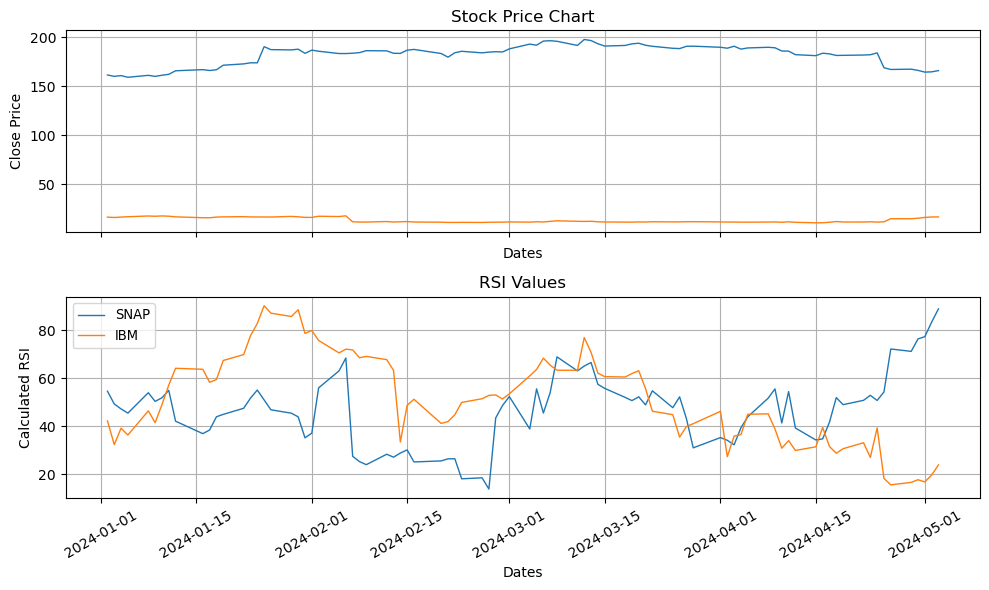

In [7]:
### Plot RSI for chosen ticker
# Create a list of tickers you want to plot
tickers_to_plot = ['SNAP', 'IBM']
stock_data_to_plot = import_stock_data(tickers_to_plot, start_date)
rsi_df_to_plot, rsi_vals = calculate_rsi(stock_data, periods = 14, tickers = tickers_to_plot)

# Call plot_function with the correct arguments
plot = plot_function(stock_data_to_plot, rsi_df_to_plot, tickers = tickers_to_plot, indicator_type = 'RSI')
plot